# Bank Customer Prediction 

## Libraries Dependence

In [1]:
import pandas as pd
import numpy as np
# Matplotlib for visualization
from matplotlib import pyplot as plt
# display plots in the notebook
%matplotlib inline
#Seaborn for easier visualization
import seaborn as sns
sns.set_style('darkgrid')
#store elements as dictionary keys and their counts as dictionary values
from collections import Counter

## Data Source

#### Kaggle - Churn Modelling Calssification Data Set 

#### This data set contains details of a bank's customers and the target variable is a binary variable reflecting the fact whether the customer left the bank (closed his account) or he continues to be a customer.

#### It consists of 10,000 records with demographic and bank history information from customers from three countries, France, Germany and Spain.


In [ ]:
#Exploratory Analysis
#Read the CSV and Perform Basic Data Cleaning

In [5]:
df = pd.read_csv(r"C:\Users\MY COMPUTER HOUSE\Documents\data sets\customer_Modelling.csv")
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [6]:
print(f"DataFrame Dimensions: {df.shape}")
df.head()

DataFrame Dimensions: (10000, 14)


,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [8]:
#List number of unique customer IDs
df.CustomerId.nunique()

10000

In [9]:
df.duplicated().sum()

0

## Unuse Features

####  To make dataframe easily readable we will drop features not needed for machine learning

#### CustomerId
#### Surname

In [10]:
#Drop unused features
df.drop([ 'CustomerId', 'Surname'], axis=1, inplace=True)
print(f"DataFrame dimensions: {df.shape}")
df.head()


DataFrame dimensions: (10000, 12)


,RowNumber,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [11]:
df.isnull().sum()

RowNumber          0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

## Distribution of Numeric Features

### Plotting HIstogram grid

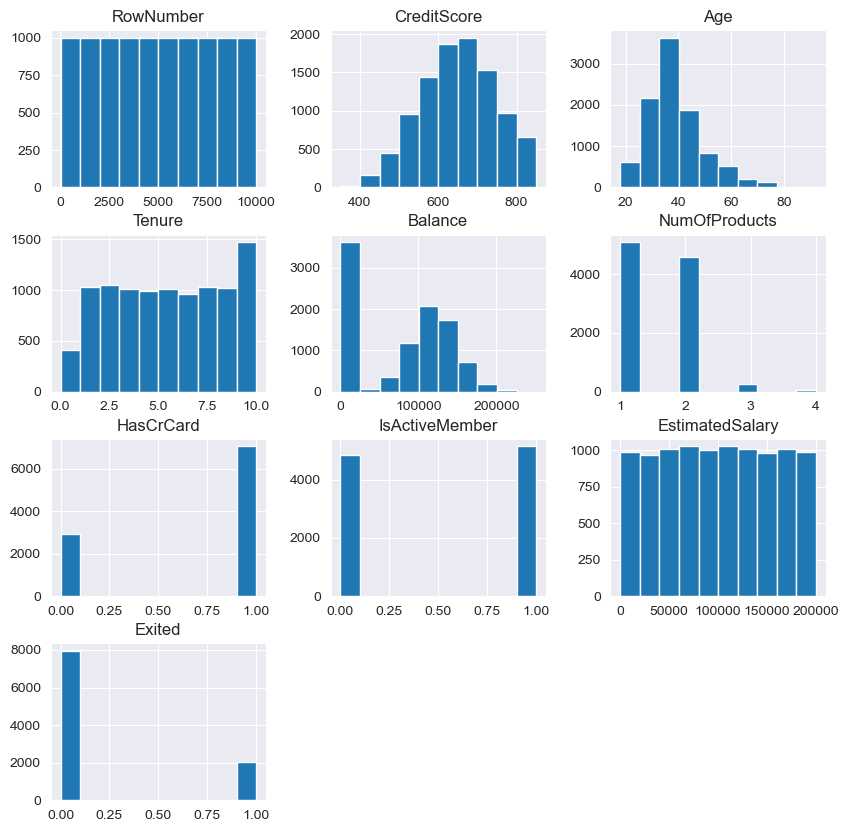

In [12]:
#plot histogram grid
df.hist(figsize=(10,10))
plt.show()

### Summary statistics for numeric features

In [13]:
#Summerize numerical features
df.describe()

,RowNumber,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


#### From the summary statistics and the histograms we can conclude that all features look OK. We do not see any extreme values for any feature

### Didtribution of Categorical Features

In [14]:
#Summerize categorical features
df.describe(include=['object'])

,Geography,Gender
count,10000,10000
unique,3,2
top,France,Male
freq,5014,5457


#### This shows us the number of unique classes for each feature. For example, there are more males (5457) than females. And France is most common of 3 geographies in our dataframe. There are no sparse classes.

### Visualizetion of this information

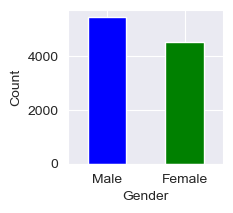

Counter({'Female': 4543, 'Male': 5457})

In [15]:
#Bar plot for "Gender"
plt.figure(figsize=(2,2))
df['Gender'].value_counts().plot.bar(color=['b', 'g'])
plt.ylabel('Count')
plt.xlabel('Gender')
plt.xticks(rotation=0)
plt.show()
# Display count of each class
Counter(df.Gender)

#### In our data sample there are more males than females 

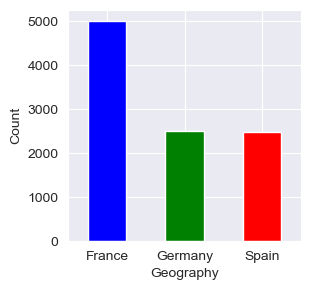

Counter({'France': 5014, 'Spain': 2477, 'Germany': 2509})

In [16]:
#Bar plot for "Geography"
plt.figure(figsize=(3,3))
df['Geography'].value_counts().plot.bar(color=['b', 'g', 'r'])
plt.ylabel('Count')
plt.xlabel('Geography')
plt.xticks(rotation=0)
plt.show()
# Display count of each class
Counter(df.Geography)

#### majority of customers are from France, about 50%, and from Germany and Spain around 25% each

### Exited Segmentation by Gender

In [21]:
# Segment "Exited" by gender and display the frequency and percentage within a each class
grouped = df.groupby('Gender')['Exited'].agg(Count='value_counts')
grouped

Count
Gender Exited       
Female 0        3404
       1        1139
Male   0        4559
       1         898

In [22]:
#Recognize dataframe for plotting count
dfgc = grouped
dfgc = dfgc.pivot_table(values='Count', index='Gender', columns=['Exited'])
dfgc

Exited,0,1
Gender,,
Female,3404,1139
Male,4559,898


In [23]:
import warnings
warnings.filterwarnings('ignore')

# Calculate percentage within each class
dfgp = grouped.groupby(level=[0]).apply(lambda g: round(g * 100 / g.sum(), 2))
dfgp.rename(columns={'Count': 'Percentage'}, inplace=True)
dfgp

Percentage
Gender Exited            
Female 0            74.93
       1            25.07
Male   0            83.54
       1            16.46

In [25]:
# Recognize dataframe for plotting percentage
dfgp = dfgp.pivot_table(values='Percentage', index='Gender', columns=['Exited'])
dfgp

Exited,0,1
Gender,,
Female,74.93,25.07
Male,83.54,16.46


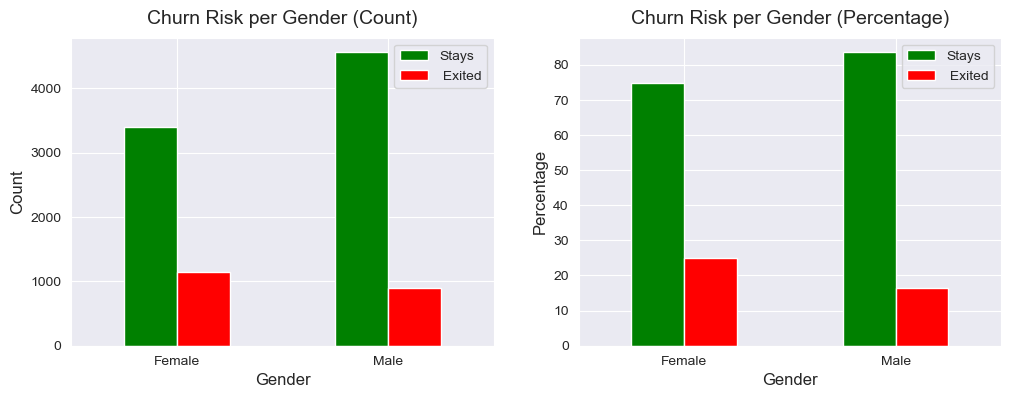

In [26]:
# Churn distribution by gender, count + percentage
labels = ['Stays',' Exited']
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12,4))
dfgc.plot(kind='bar',
 color=['g', 'r'],
 rot=0, 
 ax=ax1)
ax1.legend(labels)
ax1.set_title('Churn Risk per Gender (Count)', fontsize=14, pad=10)
ax1.set_ylabel('Count',size=12)
ax1.set_xlabel('Gender', size=12)
dfgp.plot(kind='bar',
 color=['g', 'r'],
 rot=0,
 ax=ax2)
ax2.legend(labels)
ax2.set_title('Churn Risk per Gender (Percentage)', fontsize=14, pad=10)
ax2.set_ylabel('Percentage',size=12)
ax2.set_xlabel('Gender', size=12)
plt.show()

### Exited Segmentation by Geography

In [28]:
# Segment "Exited" by geography and display the frequency and percentage within each class
grouped = df.groupby('Geography')['Exited'].agg(Count='value_counts')
grouped

Count
Geography Exited       
France    0        4204
          1         810
Germany   0        1695
          1         814
Spain     0        2064
          1         413

In [29]:
# Recognize dataframe for plotting count
dfgeoc = grouped
dfgeoc = dfgeoc.pivot_table(values='Count', index='Geography', columns=['Exited'])
dfgeoc

Exited,0,1
Geography,,
France,4204,810
Germany,1695,814
Spain,2064,413


In [30]:
# Calculate the percentage within each class
dfgeop = grouped.groupby(level=[0]).apply(lambda g: round(g * 100 / g.sum(), 2))
dfgeop.rename(columns={'Count' : 'Percentage'}, inplace=True)
dfgeop

Percentage
Geography Exited            
France    0            83.85
          1            16.15
Germany   0            67.56
          1            32.44
Spain     0            83.33
          1            16.67

In [31]:
# Calculate the percentage within each class
dfgeop = grouped.groupby(level=[0]).apply(lambda g: round(g * 100 / g.sum(), 2))
dfgeop.rename(columns={'Count' : 'Percentage'}, inplace=True)
dfgeop

Percentage
Geography Exited            
France    0            83.85
          1            16.15
Germany   0            67.56
          1            32.44
Spain     0            83.33
          1            16.67

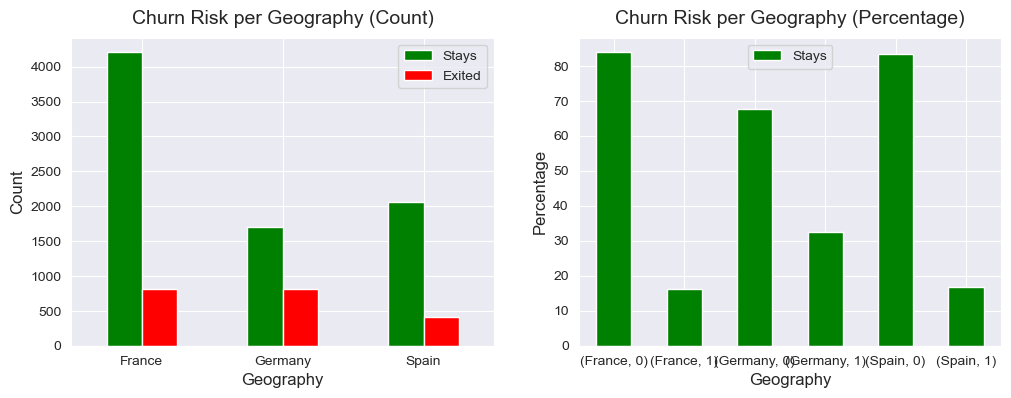

In [32]:
# Churn distribution by geography, count + percentage
labels= ['Stays', 'Exited']
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))
dfgeoc.plot(kind='bar',
 color=['g', 'r'],
 rot=0, 
 ax=ax1)
ax1.legend(labels)
ax1.set_title('Churn Risk per Geography (Count)', fontsize=14, pad=10)
ax1.set_ylabel('Count',size=12)
ax1.set_xlabel('Geography', size=12)
dfgeop.plot(kind='bar',
 color=['g', 'r'],
 rot=0, 
 ax=ax2)
ax2.legend(labels)
ax2.set_title('Churn Risk per Geography (Percentage)', fontsize=14, pad=10)
ax2.set_ylabel('Percentage',size=12)
ax2.set_xlabel('Geography', size=12)
plt.show()


#### The smallest number of customers are from Germany but it looks that they are most likely to leave the bank. Almost one third of German customers in our sample left the bank

## Correlations

In [34]:
# Calculate correlations between numeric features
correlation = df.corr()
# sort features in order of their correlation with "Exited"
sort_corr_cols = correlation.Exited.sort_values(ascending=False).keys()
sort_corr = correlation.loc[sort_corr_cols, sort_corr_cols]
sort_corr

,Exited,Age,Balance,EstimatedSalary,HasCrCard,Tenure,RowNumber,CreditScore,NumOfProducts,IsActiveMember
Exited,1.000000,0.285323,0.118533,0.012097,-0.007138,-0.014001,-0.016571,-0.027094,-0.047820,-0.156128
Age,0.285323,1.000000,0.028308,-0.007201,-0.011721,-0.009997,0.000783,-0.003965,-0.030680,0.085472
Balance,0.118533,0.028308,1.000000,0.012797,-0.014858,-0.012254,-0.009067,0.006268,-0.304180,-0.010084
EstimatedSalary,0.012097,-0.007201,0.012797,1.000000,-0.009933,0.007784,-0.005988,-0.001384,0.014204,-0.011421
HasCrCard,-0.007138,-0.011721,-0.014858,-0.009933,1.000000,0.022583,0.000599,-0.005458,0.003183,-0.011866
Tenure,-0.014001,-0.009997,-0.012254,0.007784,0.022583,1.000000,-0.006495,0.000842,0.013444,-0.028362
RowNumber,-0.016571,0.000783,-0.009067,-0.005988,0.000599,-0.006495,1.000000,0.005840,0.007246,0.012044
CreditScore,-0.027094,-0.003965,0.006268,-0.001384,-0.005458,0.000842,0.005840,1.000000,0.012238,0.025651
NumOfProducts,-0.047820,-0.030680,-0.304180,0.014204,0.003183,0.013444,0.007246,0.012238,1.000000,0.009612
IsActiveMember,-0.156128,0.085472,-0.010084,-0.011421,-0.011866,-0.028362,0.012044,0.025651,0.009612,1.000000


#### Seaborn's .heatmap() function to visualize the correlation grid

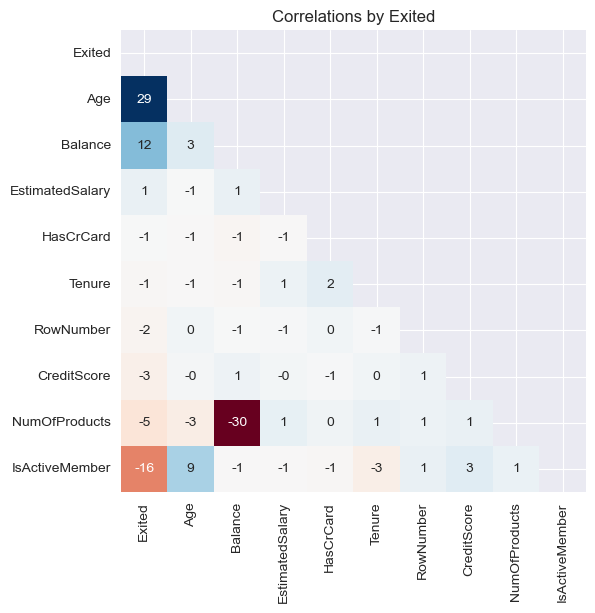

In [35]:
# Generate a mask for the upper triangle
corr_mask = np.zeros_like(correlation)
corr_mask[np.triu_indices_from(corr_mask)]=1
# Make the figsize 6X6
plt.figure(figsize=(6,6))
# Plot heatmap of annotated correlations; change background to white
##with sns.axes_style('white'):
sns.heatmap(sort_corr*100, 
 cmap='RdBu', 
 annot=True,
 fmt='.0f',
 mask=corr_mask,
 cbar=False)
 
plt.title('Correlations by Exited', fontsize=12)
plt.yticks(rotation=0)
plt.show()


#### Very weak correlations in general. Only weak positive correlation with age, very weak positive correlation with balance, and very weak negative correlations with number of products and membership

## Distributions the Target Feature

In [36]:
# Define our target variable
y = df.Exited
y.shape

(10000,)

#### displays count and percentage per class of the target feature.

In [37]:
# Function to display count and percentage per class of target feature
def class_count(a):
 counter=Counter(a)
 kv=[list(counter.keys()),list(counter.values())]
 dff = pd.DataFrame(np.array(kv).T, columns=['Exited','Count'])
 dff['Count'] = dff['Count'].astype('int64')
 dff['%'] = round(dff['Count'] / a.shape[0] * 100, 2)
 return dff.sort_values('Count',ascending=False)


In [38]:
# Let's use the function
dfcc = class_count(y)
dfcc

,Exited,Count,%
1,0,7963,79.63
0,1,2037,20.37


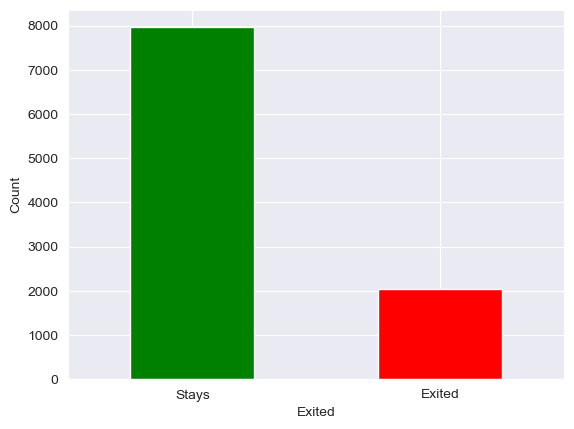

In [39]:
# Plot distribution of target variable, Exited column
labels=['Stays', 'Exited']
dfcc.plot.bar(x='Exited', y='Count', color=['g', 'r'], legend=False)
plt.xticks(dfcc['Exited'], labels, rotation=0)
plt.ylabel('Count')
plt.show()


#### We can see that our dataset is imbalanced. The majority class, "Stays" (0), has around 80% data points and the minority class, "Churn" (1), has around 20% datapoints.

## Finalizing the Dataframe

In [40]:
df.head()

,RowNumber,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [41]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CreditScore      10000 non-null  int64  
 2   Geography        10000 non-null  object 
 3   Gender           10000 non-null  object 
 4   Age              10000 non-null  int64  
 5   Tenure           10000 non-null  int64  
 6   Balance          10000 non-null  float64
 7   NumOfProducts    10000 non-null  int64  
 8   HasCrCard        10000 non-null  int64  
 9   IsActiveMember   10000 non-null  int64  
 10  EstimatedSalary  10000 non-null  float64
 11  Exited           10000 non-null  int64  
dtypes: float64(2), int64(8), object(2)
memory usage: 937.6+ KB


#### Dataframe looks good

###### harshani_aberathne